#### Desafio Respostas

#### Leitura dos Dados e bibliotecas

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split 

### Avaliação de métricas
from sklearn.metrics import mean_squared_error

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Criar DataFrame com os valores fornecidos
data = {
    'Height (cm)': [150, 160, 170, 165, 175, 180, 155, 165, 168, 172],
    'Weight (kg)': [45, 50, 60, 55, 65, 70, 48, 53, 56, 61]
}

df = pd.DataFrame(data)

# Salvar DataFrame em um arquivo CSV
df.to_csv('data/resposta.csv', index=False)

#### Análise exploratória

Primeiras linhas do DataFrame:
   Height (cm)  Weight (kg)
0          150           45
1          160           50
2          170           60
3          165           55
4          175           65

Estatísticas básicas das variáveis:
       Height (cm)  Weight (kg)
count     10.00000    10.000000
mean     166.00000    56.300000
std        9.11653     7.803845
min      150.00000    45.000000
25%      161.25000    50.750000
50%      166.50000    55.500000
75%      171.50000    60.750000
max      180.00000    70.000000


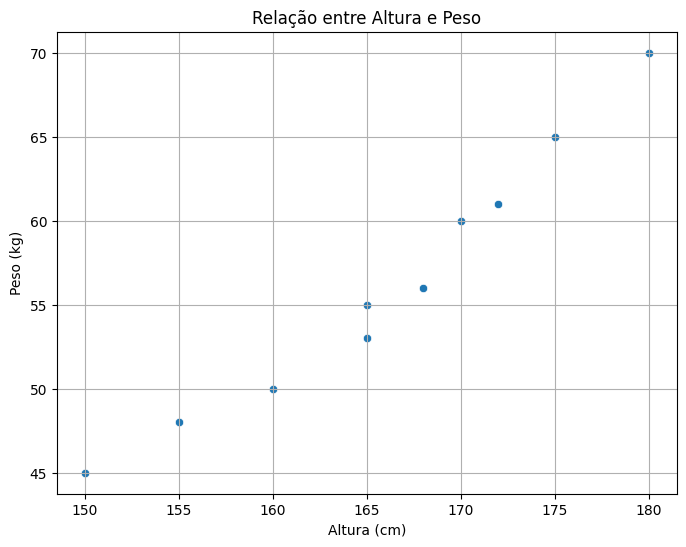

In [5]:
df = pd.read_csv('data/resposta.csv')

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head())

# Verificar estatísticas básicas das variáveis
print("\nEstatísticas básicas das variáveis:")
print(df.describe())

# Plotar um gráfico de dispersão para visualizar a relação entre altura e peso
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height (cm)', y='Weight (kg)')
plt.title('Relação entre Altura e Peso')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.show()

#### Definição do Modelo e treino

In [6]:
# Instanciar os modelos
linear_reg = LinearRegression()
svr = SVR(kernel='linear')
decision_tree = DecisionTreeRegressor()

In [7]:
# Separar as variáveis independentes (X) e dependentes (y)
X = df[['Height (cm)']]
y = df['Weight (kg)']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Treinar os modelos
linear_reg.fit(X_train, y_train)
svr.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

#### Testando e avaliando os Modelos

In [9]:
# Prevendo valores
tree_predict = decision_tree.predict(X_test)

linear_predict = linear_reg.predict(X_test)

svm_predict = svr.predict(X_test)

In [12]:
# RMSE error
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_predict))
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predict))
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predict))

print(f"Pontuação RMSE Decision Tree: {tree_rmse}")
print(f"Pontuação RMSE Linear Regression: {linear_rmse}")
print(f"Pontuação RMSE Support Vector Regressor: {svm_rmse}")

Pontuação RMSE Decision Tree: 3.1622776601683795
Pontuação RMSE Linear Regression: 2.073462815652542
Pontuação RMSE Support Vector Regressor: 2.2344077017800505
